# Исключения

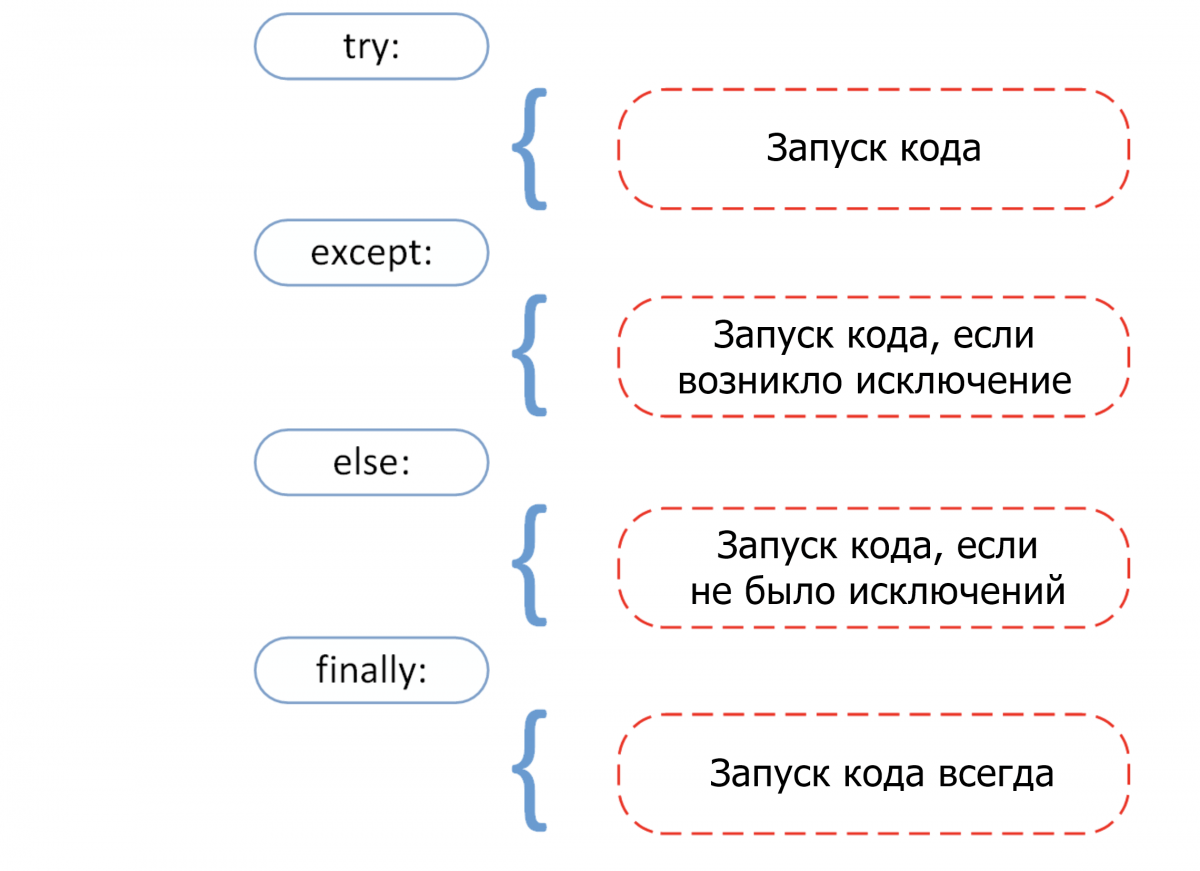

Ошибки могут быть разных видов:

* Синтаксические
* Недостаточно памяти
* Ошибки рекурсии
* Исключения

Стоит помнить то, что программы с блоками исключений работают чуть медленнее, чем без них.
Поэтому стоит ограничить использование обработки исключений в Python и применять его в редких случаях.
Например, когда вы не уверены, что будет вводом: целое или число с плавающей точкой, или не уверены, существует ли файл, который нужно открыть.

### Syntax errors



In [1]:
from random import random, randint
from sys import call_tracing

a = 8
b = 10
# c = a b

SyntaxError: invalid syntax (2212878219.py, line 3)

### OutofMemoryError

Обработать ошибку памяти можно с помощью обработки исключений — резервного исключения. Оно используется, когда у интерпретатора заканчивается память и он должен немедленно остановить текущее исполнение. В редких случаях Python вызывает OutofMemoryError, позволяя скрипту каким-то образом перехватить самого себя, остановить ошибку памяти и восстановиться.

Но поскольку Python использует архитектуру управления памятью из языка C (функция malloc()), не факт, что все процессы восстановятся — в некоторых случаях MemoryError приведет к остановке. Следовательно, обрабатывать такие ошибки не рекомендуется, и это не считается хорошей практикой.

### Recursion Error(StackOverflow)



In [2]:
def recursion():
    return recursion()

recursion()

RecursionError: maximum recursion depth exceeded

In [ ]:
# можно починить
import sys

sys.setrecursionlimit(10000)

### IndentationError

это ошибка вознкает при проблемах с отступами

### Исключения

In [6]:
# TypeError

a = 'Hi'
b = 2
c = a + b

ZeroDivisionError: division by zero

In [ ]:
# ZeroDivisionError

a = 4
b = 0
c = a / b

### Встроенные исключения

```
BaseException
 +-- SystemExit
 +-- KeyboardInterrupt
 +-- GeneratorExit
 +-- Exception
      +-- StopIteration
      +-- StopAsyncIteration
      +-- ArithmeticError
      |    +-- FloatingPointError
      |    +-- OverflowError
      |    +-- ZeroDivisionError
      +-- AssertionError
      +-- AttributeError
      +-- BufferError
      +-- EOFError
      +-- ImportError
      |    +-- ModuleNotFoundError
      +-- LookupError
      |    +-- IndexError
      |    +-- KeyError
      +-- MemoryError
      +-- NameError
      |    +-- UnboundLocalError
      +-- OSError
      |    +-- BlockingIOError
      |    +-- ChildProcessError
      |    +-- ConnectionError
      |    |    +-- BrokenPipeError
      |    |    +-- ConnectionAbortedError
      |    |    +-- ConnectionRefusedError
      |    |    +-- ConnectionResetError
      |    +-- FileExistsError
      |    +-- FileNotFoundError
      |    +-- InterruptedError
      |    +-- IsADirectoryError
      |    +-- NotADirectoryError
      |    +-- PermissionError
      |    +-- ProcessLookupError
      |    +-- TimeoutError
      +-- ReferenceError
      +-- RuntimeError
      |    +-- NotImplementedError
      |    +-- RecursionError
      +-- SyntaxError
      |    +-- IndentationError
      |         +-- TabError
      +-- SystemError
      +-- TypeError
      +-- ValueError
      |    +-- UnicodeError
      |         +-- UnicodeDecodeError
      |         +-- UnicodeEncodeError
      |         +-- UnicodeTranslateError
      +-- Warning
           +-- DeprecationWarning
           +-- PendingDeprecationWarning
           +-- RuntimeWarning
           +-- SyntaxWarning
           +-- UserWarning
           +-- FutureWarning
           +-- ImportWarning
           +-- UnicodeWarning
           +-- BytesWarning
           +-- ResourceWarning
```

In [10]:
try:
    print('Нажмите Ctrl+C и прервите Kernel:')
    inp = input()
except KeyboardInterrupt:
    print('Исключение KeyboardInterrupt')
else:
    print('Исключений не произошло')
finally:
    print('Этот код выполнится в любом случае')


Исключение KeyboardInterrupt
Этот код выполнится в любом случае


### Assert

Когда инструкция утверждения не верна, вызывается ошибка утверждения.

In [12]:
try:
    a = 10
    b = 'Hi'
    assert a == b
except AssertionError:
    print('Исключение AssertionError')
else:
    print('Ошибок нет')

Ошибок нет


### Пользовательские исключения

In [21]:
from random import randint

class MyException(Exception):
    def __init__(self, data):
        self.data = data
    def __str__(self):
        return repr(self.data)

a = randint(0, 1)
try:
    if a > 0:
        raise MyException("Кастомное исключение")
except MyException as e:
    print('Возникло исключение:', e.data)
else:
    print('Ошибок нет')

Ошибок нет


### Задания

1. Напиши код, который:

запрашивает у пользователя число

пытается привести его к int

если ввод некорректный — выводит "Not a number"

(используй try / except)

In [25]:
a = input()
try:
    a = int(a)
except ValueError:
    print('Not a number')
else:
    print(a)

Not a number



2. Напиши функцию safe_divide(a, b), которая:

возвращает a / b

если b == 0 → возвращает строку "Division by zero"

если типы некорректные → "Invalid input"

In [30]:
def safe_divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        return 'Division by zero'
    except TypeError:
        return 'Invalid input'

print(safe_divide(1, 2))

0.5


3. Напиши код, который:

пытается открыть файл data.txt

если файл не найден — выводит "File not found"

если найден — выводит его содержимое

In [7]:
try:
    f = open('files/data.txt', encoding='utf-8', mode='r')
    print(f.read())
except FileNotFoundError:
    print('File not found')

File not found


4. Дан список:

values = ["10", "20", "abc", "30", None, "40"]

Напиши код, который:

пытается привести элементы к int

пропускает некорректные значения

собирает корректные числа в новый список

In [14]:
values = ["10", "20", "abc", "30", None, "40"]
clear_values = []
for i in range(len(values)):
    try:
        clear_values.append(int(values[i]))
    except ValueError, TypeError:
        print('Error occurred')

print(clear_values)

Error occured
Error occured
[10, 20, 30, 40]


5. Дан код:

def parse_int(value):
    return int(value)

Перепиши функцию так, чтобы:

при ValueError возвращалось "Value error"

при TypeError возвращалось "Type error"

In [19]:
def parse_int(value):
    try:
        return int(value)
    except ValueError:
        return 'Value Error'
    except TypeError:
        return 'Type Error'

print(parse_int('2345'))
print(parse_int('abv'))
print(parse_int('23.43dafs23}}|'))


2345
Value Error
Value Error


6. Напиши функцию mean_safe(nums), которая:

возвращает среднее значение списка

если список пустой → "Empty list"

если внутри есть некорректные значения → игнорирует их

если нет ни одного корректного числа → "No valid numbers"

In [32]:
def mean_safe(nums: list):
    if len(nums) == 0:
        return 'Empty list'
    try:
        nums_sum = 0
        nums_count = 0
        for n in nums:
            try:
                nums_sum += n
                nums_count += 1
            except TypeError, ValueError:
                print('Incorrect value')
        avg = nums_sum / nums_count
        return avg
    except ZeroDivisionError:
        return 'No valid numbers'

print(mean_safe(['1', 2, 3, 'abc']))
print(mean_safe([]))
print(mean_safe(['abc', []]))

Incorrect value
Incorrect value
2.5
Empty list
Incorrect value
Incorrect value
No valid numbers
